In [96]:
import pandas as pd
import geopandas as gpd
from tobler.area_weighted import area_interpolate
from tobler.dasymetric import masked_area_interpolate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import StringIO


In [97]:
graduationnogeodata = pd.read_parquet('finalgraduation.parquet')
graduationnogeodata.head()

,CountyName,Unnamed: 0,Unnamed: 0.1,CountyCode,DistrictCode,SchoolCode,Regular HS Diploma Graduates (Rate),Dropoutrate
0,Alameda,55058.786260,55058.786260,1.0,58955.743928,214044.350660,80.133171,10.740965
1,Amador,46067.993902,46067.993902,3.0,51356.797834,231815.176895,80.229825,3.787719
2,Butte,51652.976656,51652.976656,4.0,52482.102397,463580.839506,78.057168,15.140088
3,Calaveras,48949.265722,48949.265722,5.0,46217.943831,814737.532598,87.612575,5.551497
4,Colusa,44884.890925,44884.890925,6.0,55662.107692,367130.161538,89.476074,7.255215


In [98]:
#gradanddropooutrates_new = graduationnogeodata.rename(columns={'graduationrate': 'Regular HS Diploma Graduates (Rate)'})

In [99]:
graduationnogeodata.info()
#gradanddropooutrates_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CountyName                           58 non-null     object 
 1   Unnamed: 0                           58 non-null     float64
 2   Unnamed: 0.1                         58 non-null     float64
 3   CountyCode                           58 non-null     float64
 4   DistrictCode                         57 non-null     float64
 5   SchoolCode                           57 non-null     float64
 6   Regular HS Diploma Graduates (Rate)  58 non-null     float64
 7   Dropoutrate                          58 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.8+ KB


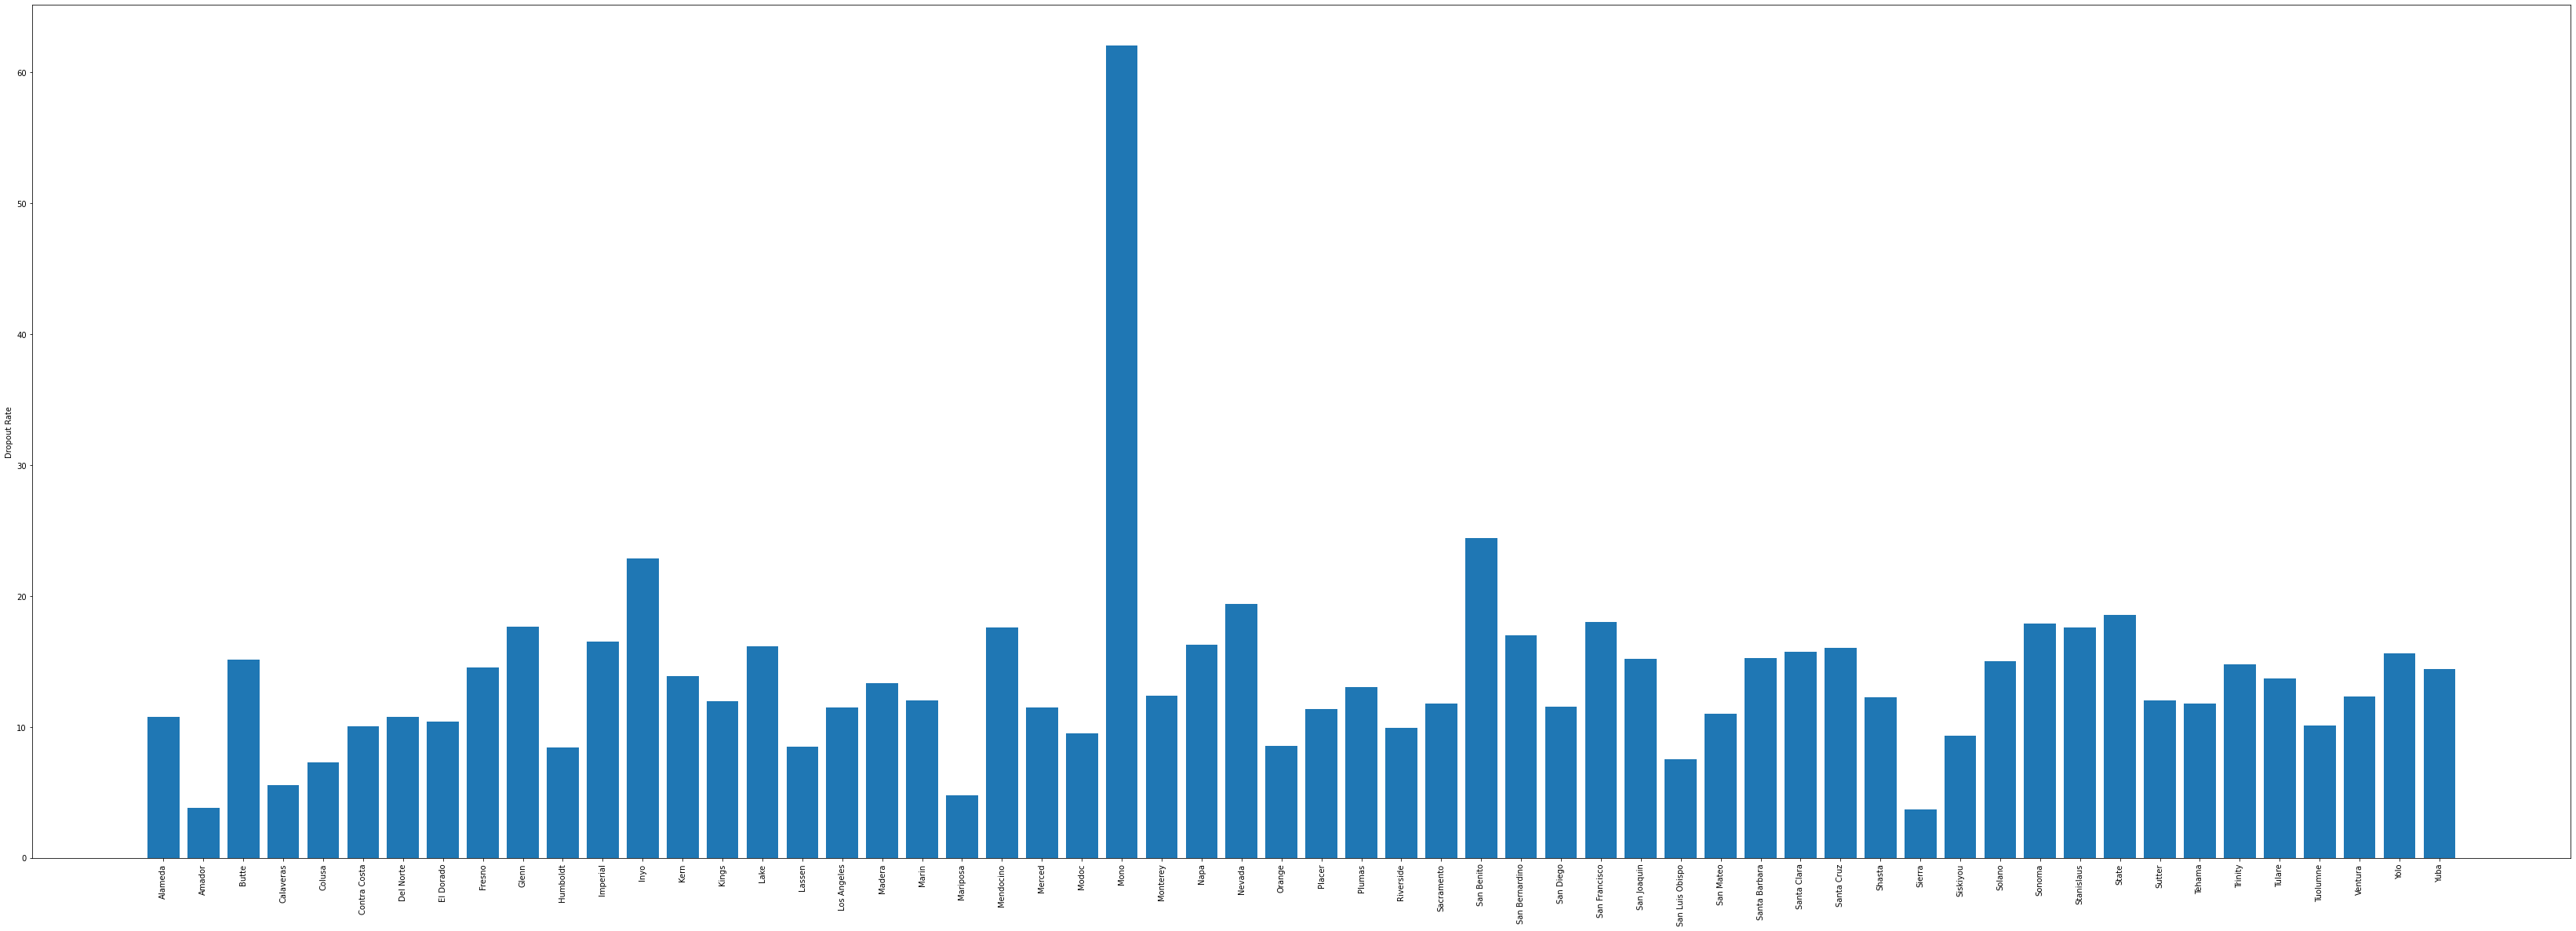

In [106]:
countyname = graduationnogeodata['CountyName'].head(84)
dropout = graduationnogeodata['Dropoutrate'].head(84)
 
# Figure Size
fig = plt.figure(figsize =(58, 20))
plt.bar(countyname[0:58],dropout[0:58])  
plt.ylabel('Dropout Rate')
plt.xticks(rotation=90)
plt.show()


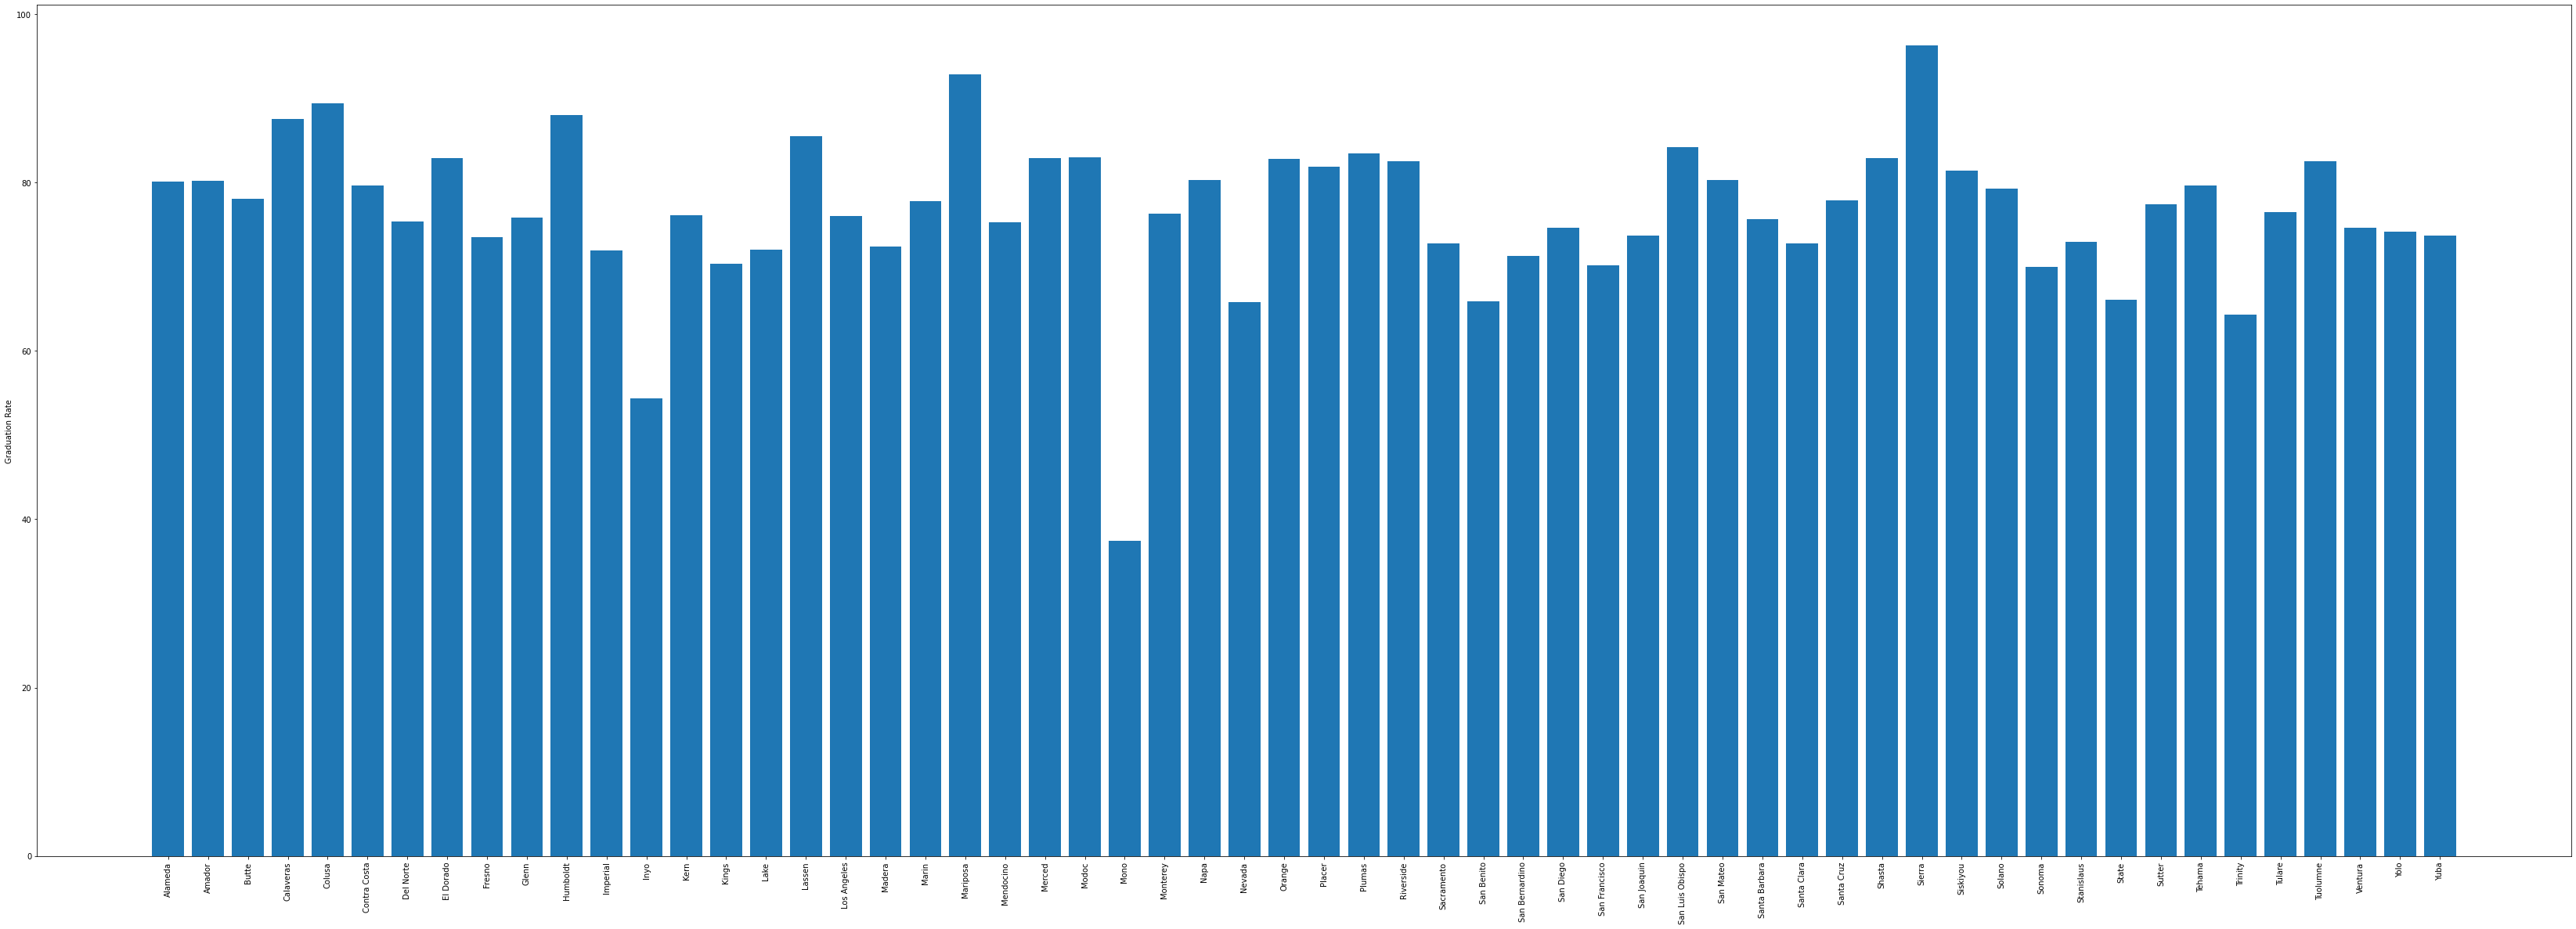

In [107]:
gradrate = graduationnogeodata['Regular HS Diploma Graduates (Rate)'].head(84)
 
# Figure Size
fig = plt.figure(figsize =(58, 20))
plt.bar(countyname[0:58],gradrate[0:58]) 
plt.ylabel('Graduation Rate')
plt.xticks(rotation=90)
plt.show()

In [102]:
incomedem = gpd.read_parquet('./gv/dem_income.parquet')
incomedem.head()

,GEOID,NAMELSAD,CountyName,geometry,total_mf_10_19,median_household_income
0,06091,Sierra County,Sierra,"POLYGON ((-120.65559 39.69356, -120.65552 39.6...",294.0,48125.0
1,06067,Sacramento County,Sacramento,"POLYGON ((-121.18857 38.71431, -121.18731 38.7...",196932.0,21635098.0
2,06083,Santa Barbara County,Santa Barbara,"MULTIPOLYGON (((-120.73429 34.90069, -120.7343...",64685.0,6803252.0
3,06009,Calaveras County,Calaveras,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",4245.0,554899.0
4,06111,Ventura County,Ventura,"MULTIPOLYGON (((-119.32922 34.22784, -119.3292...",116814.0,15141748.0


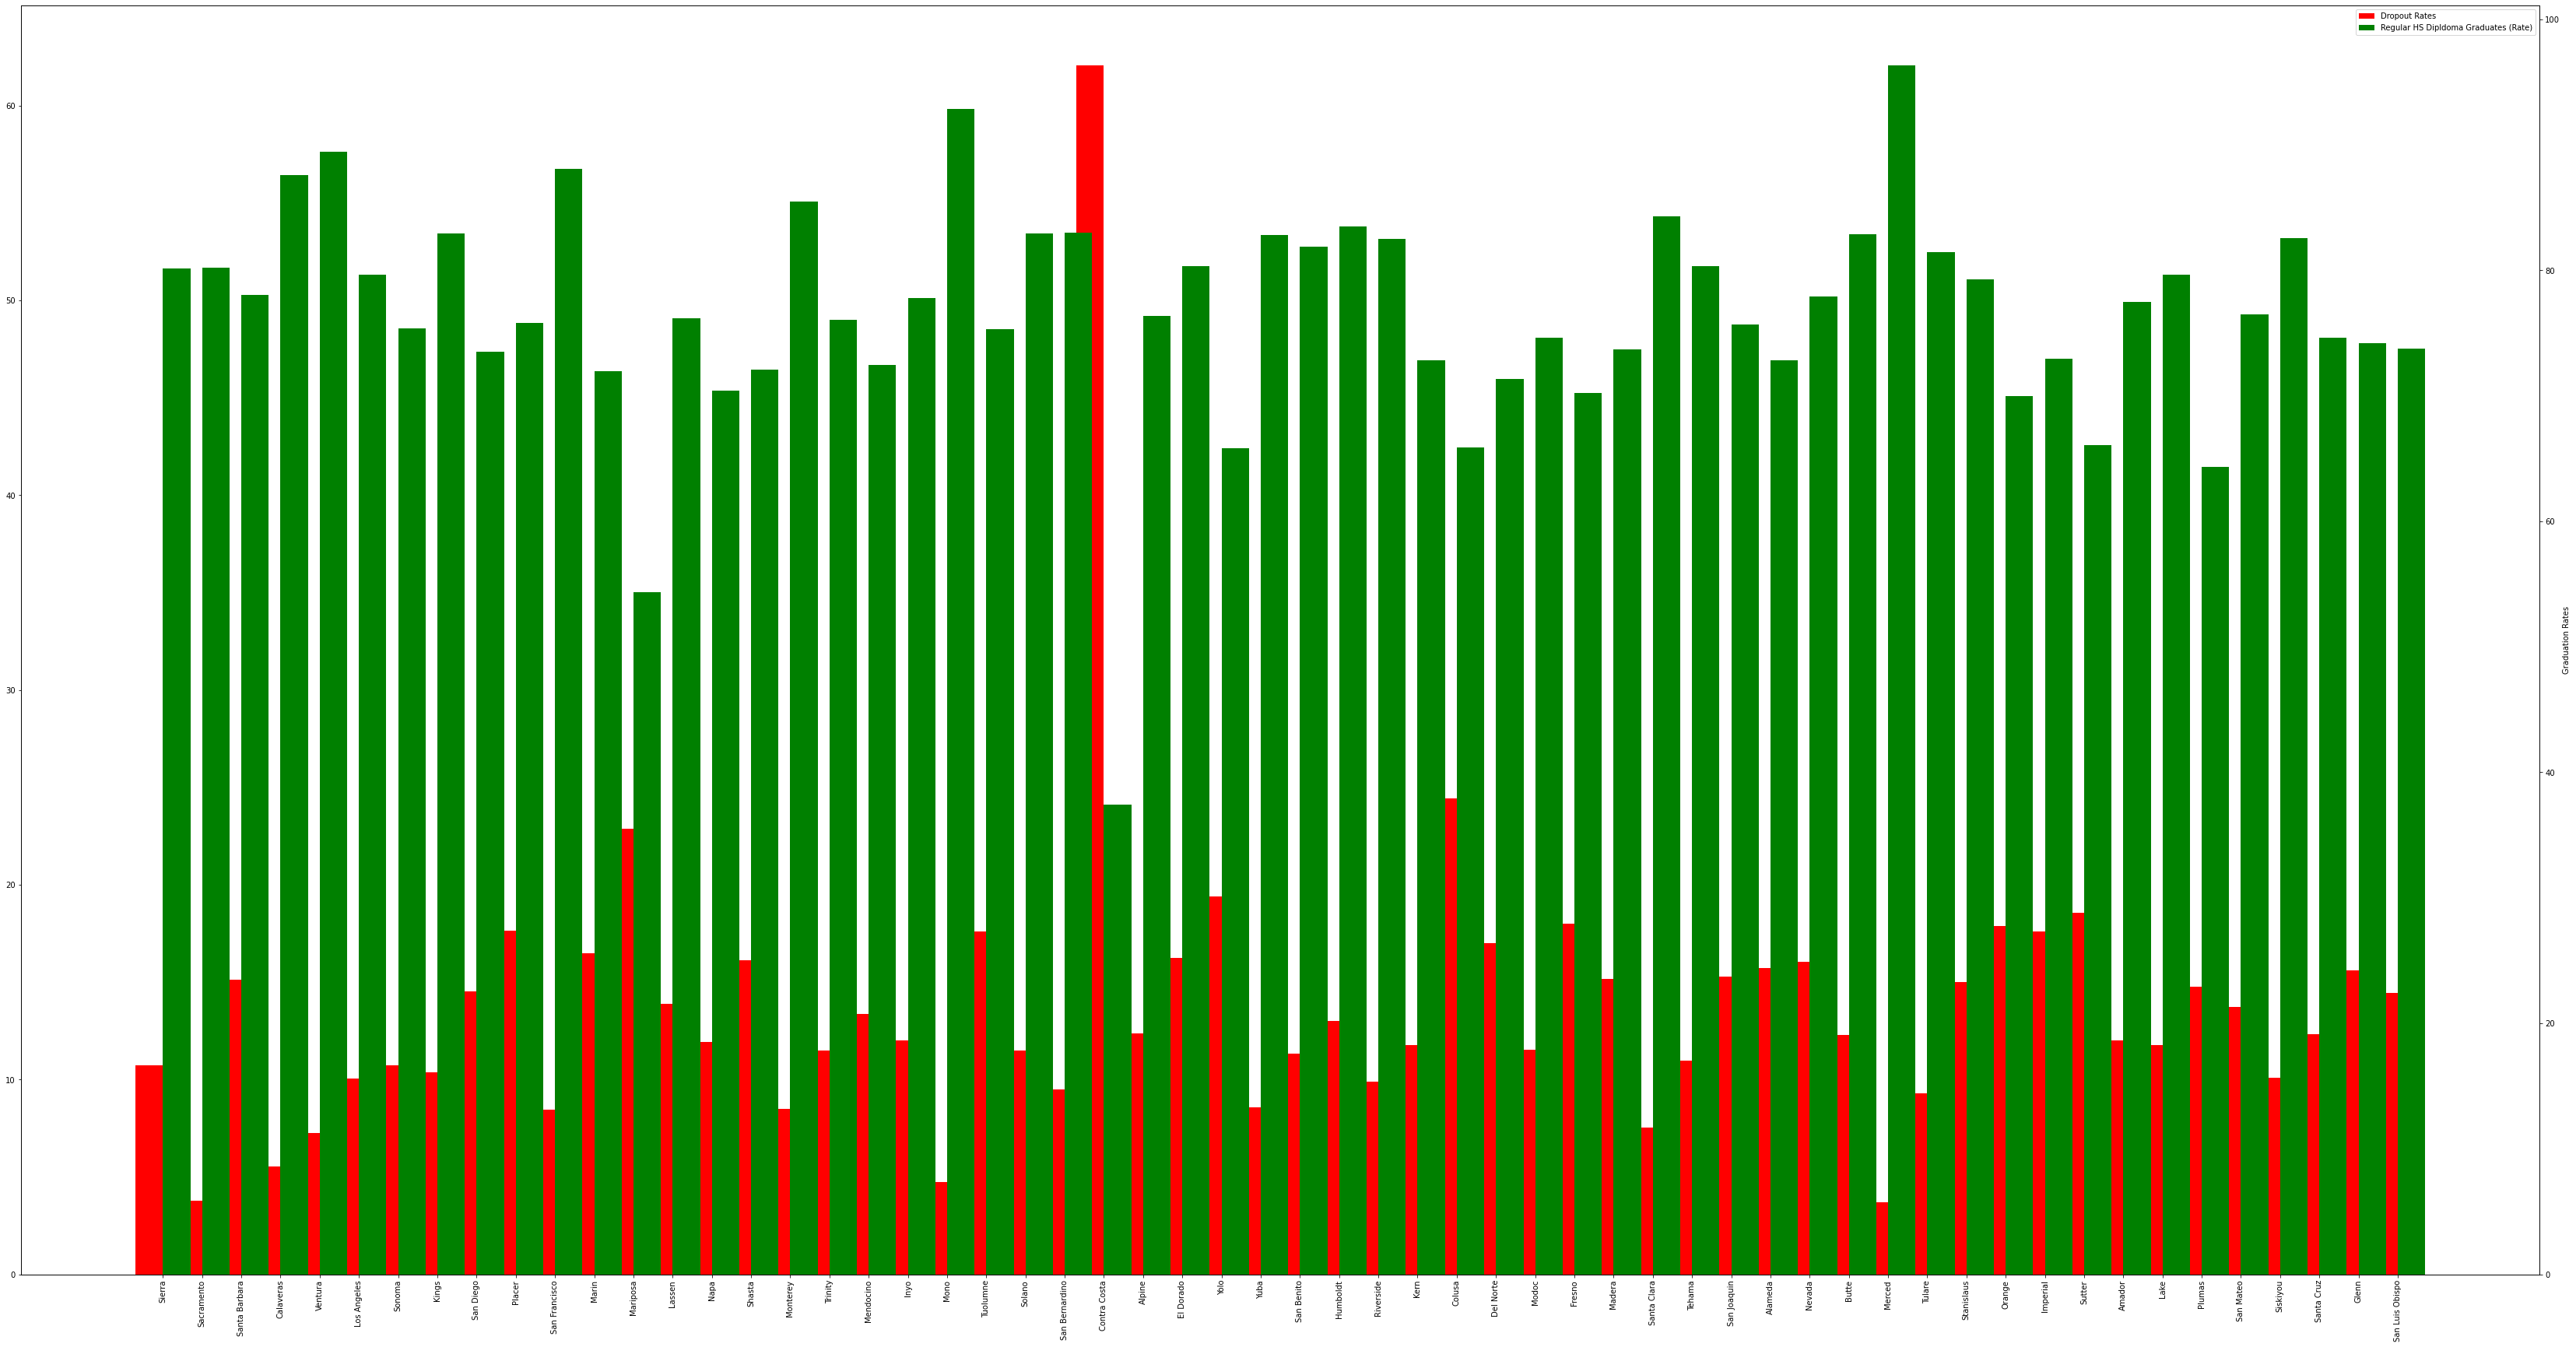

In [119]:
fig = plt.figure(figsize =(58, 30))
x = np.arange(58)
ax1 = plt.subplot(1,1,1)

w = 0.7
#plt.xticks(), will label the bars on x axis with the respective coounty names.
plt.xticks(x + w /2, countyname[0:58], rotation='vertical')
dropoutrate =ax1.bar(x, dropout[0:58] , width=w, color='r', align='center')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()
#graduates
gradrates =ax2.bar(x + w, gradrate[0:58], width=w,color='g',align='center')
#Set the Y axis label as Graduation Rates.
plt.ylabel('Graduation Rates')
#To set the legend on the plot we have used plt.legend()
plt.legend([dropoutrate, gradrates],['Dropout Rates', 'Regular HS Dipldoma Graduates (Rate)'])
#To show the plot finally we have used plt.show().
plt.show()

In [ ]:
incomedem = incomedem.reindex(sorted(incomedem.columns), axis=1)


In [18]:
incomedem.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   GEOID                    58 non-null     object  
 1   NAMELSAD                 58 non-null     object  
 2   CountyName               58 non-null     object  
 3   geometry                 58 non-null     geometry
 4   total_mf_10_19           58 non-null     float64 
 5   median_household_income  58 non-null     float64 
dtypes: float64(2), geometry(1), object(3)
memory usage: 3.2+ KB


<AxesSubplot:>

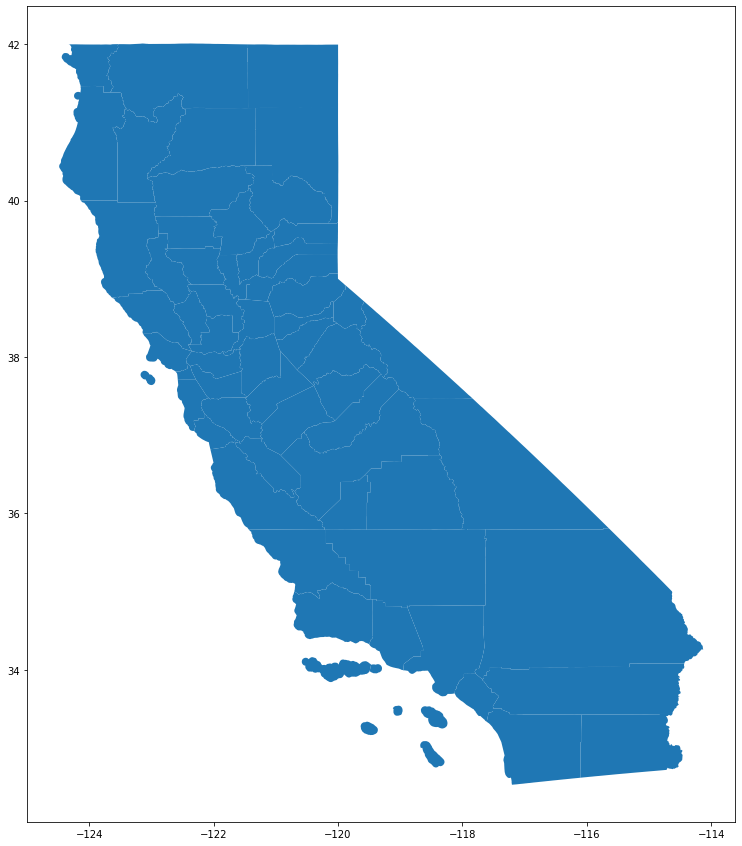

In [114]:
incomedem.plot(figsize=(15,15))

<AxesSubplot:>

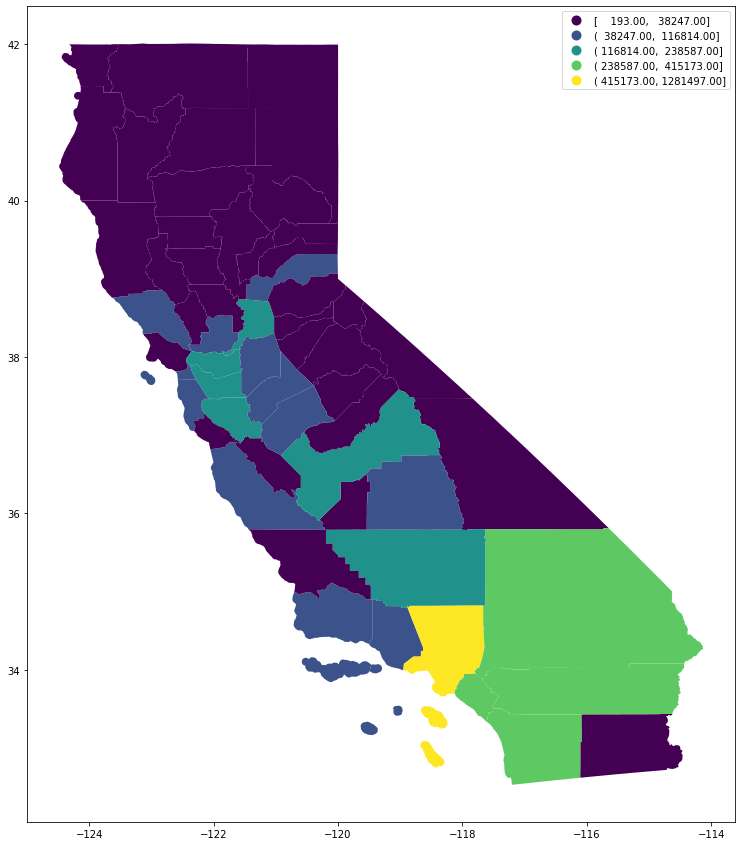

In [115]:
incomedem.plot(column='total_mf_10_19', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

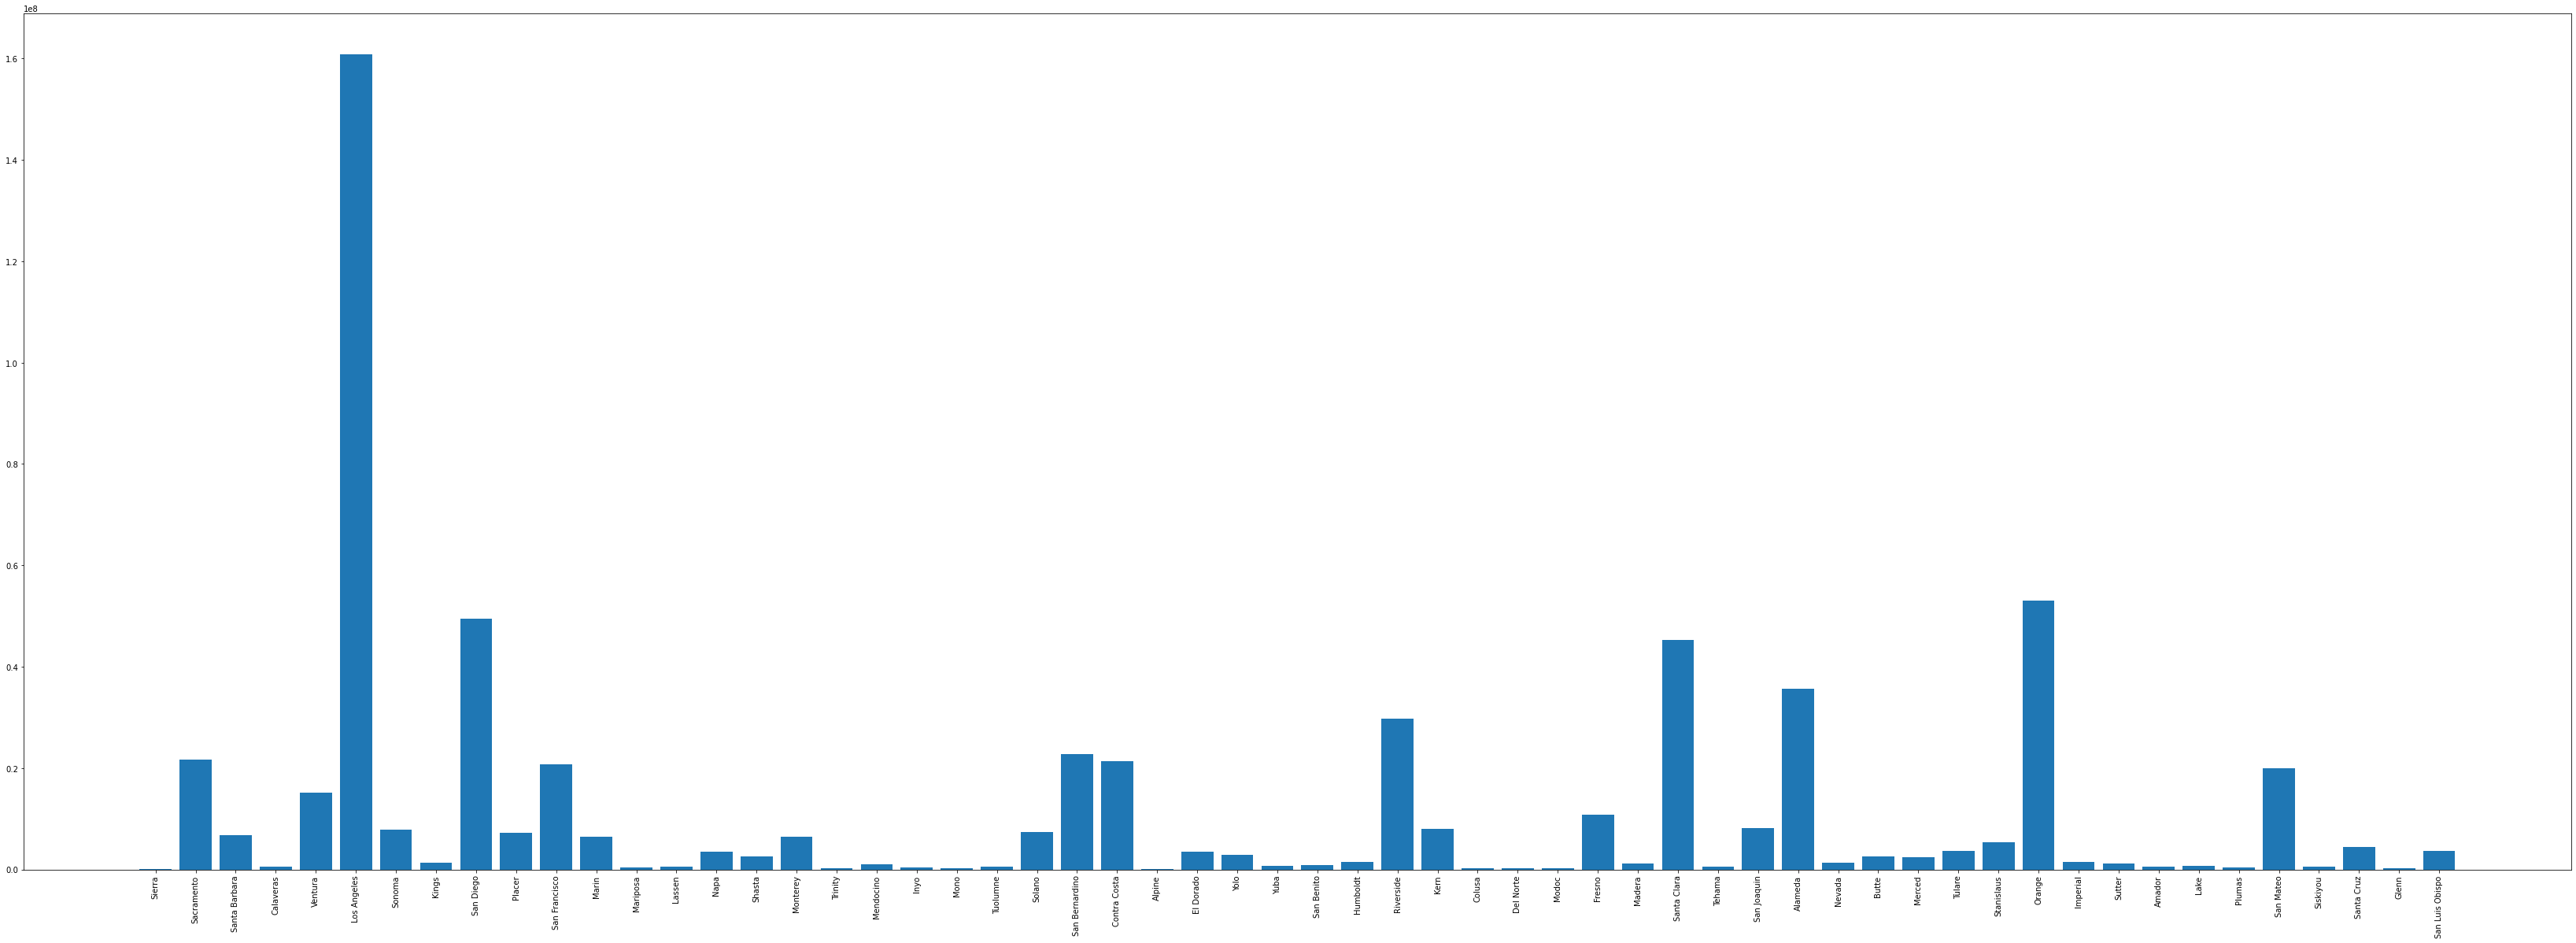

In [116]:
countyname = incomedem['CountyName'].head(84)
median_household_income= incomedem['median_household_income'].head(84)

# Figure Size
fig = plt.figure(figsize =(58, 20))
plt.bar(countyname[0:58],median_household_income[0:58])  
plt.xticks(rotation=90)
plt.show()